## Example script
Takes you through the basics of generating a lower resolution version of the paper's figures and simulations. 
#### Load dependencies and other problem constants

In [1]:
push!(LOAD_PATH, "../src/")
using Pairwise, Multiagent

d = get_pomdp()
g = get_grid(d.pomdp.states)

RectangleGrid with 2420 points

### Pairwise encounter
The code here generates the QMDP approximate solution to the pairwise encounter and visualizes the policy.
#### Solve for pairwise encounter policy
Generation of pairwise encounter policy takes a few minutes. Comment out `gen_pairwise_policy` line to use pre-computed policy datafile for the next part.

In [2]:
# gen_pairwise_policy(d)
alpha = read_alpha()

2421x36 Array{Float64,2}:
 -18.0     -12.0     -10.0     -12.0     …  -3.0       -9.0      -0.000379812
 -18.0177  -12.0     -10.0005  -12.0        -3.0       -9.01539  -0.00280014 
 -18.0846  -12.0202  -10.0055  -12.0        -3.0       -9.03762  -0.0185997  
 -18.1876  -12.3155  -10.0477  -12.0051     -3.01912   -9.16013  -0.397952   
 -18.5554  -12.7706  -10.1347  -12.082      -3.27455   -9.23944  -0.654911   
 -19.7486  -13.4504  -10.2751  -12.119   …  -3.34129   -9.17489  -0.823066   
 -19.2099  -13.4922  -10.3343  -12.1038     -3.34958   -9.05417  -0.804471   
 -18.8174  -12.2118  -10.245   -12.0896     -3.18921   -9.00921  -0.117504   
 -18.2573  -12.0     -10.1476  -12.0023     -3.00372   -9.00154  -0.0319676  
 -18.0454  -12.0     -10.0468  -12.0        -3.0       -9.00026  -0.00870843 
 -18.0     -12.0     -10.0212  -12.0     …  -3.0       -9.0      -0.00179066 
 -18.1042  -12.0     -10.0     -12.0        -3.0       -9.00264  -0.00565345 
 -18.5132  -12.0     -10.0062  -12.000

#### Visualize policy as heatmap

Slider{Float64}([Input{Float64}] 180.0,"p",180.0,0.0:90.0:360.0)

Slider{Float64}([Input{Float64}] 10.0,"v0",10.0,10.0:10.0:20.0)

Slider{Float64}([Input{Float64}] 10.0,"v1",10.0,10.0:10.0:20.0)

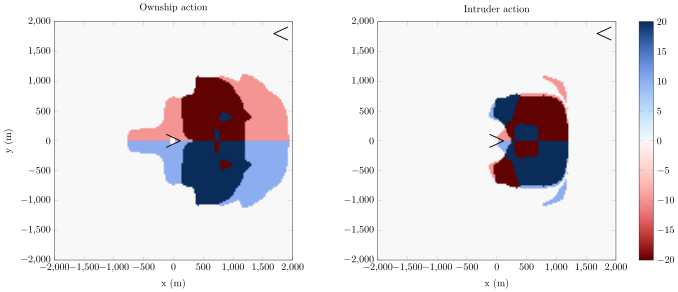

In [3]:
viz_pairwise_policy(d)

### Multithreat coordination
The code here uses the pairwise encounter solution from above to generate locally optimal policies in real-time. Basic visualization and trajectory simulation and plotting are demonstrated below.
#### Visualize example three-aircraft encounter policy heatmap
Note that `iutilFn = 1` correponds to the max-sum policy, and that `iutilFn = 2` corresponds to the max-min policy.

Slider{Int64}([Input{Int64}] 1,"iutilFn",1,1:2)

Slider{Int64}([Input{Int64}] 180,"p",180,0:30:360)

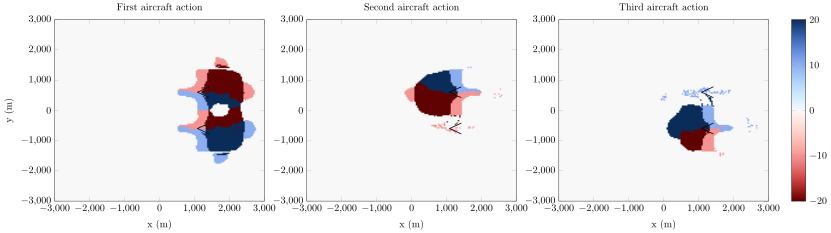

In [4]:
viz_policy(alpha, g)

#### Four-aircraft encounter simulation with trajectory visualization
Change the arguments to the desired coordination or baseline algorithm and utility function.

number of collisions = 0, average decision time = 3.965e-01 ms

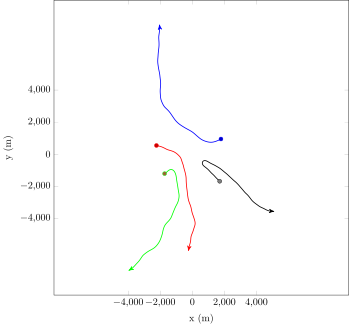

In [5]:
algorithm = utm # input utm, uncrd, coord, naive (closest-threat), or distr
utility = maxmin # input maxmin or maxsum
plot_trajs(algorithm, utility, alpha, g)

#### Bulk stress tests

In [6]:
nuavs = 2:5
nsim = 10
bulk_test(nuavs, nsim, alpha, g)

beginning stress tests...
nuavs = 2: cputime = 5.46e-01 sec
maxmin nlms: [0,0,0,0,0]
maxmin nlms bool: [0,0,0,0,0]
average maxmin times: [2.3313348999999997e-5,0.000302456896,0.00018338532099999998,9.709178200000008e-5,3.8544840999999996e-5]
maxsum nlms: [0,0,0,0,0]
maxsum nlms bool: [0,0,0,0,0]
average maxsum times: [2.3120076e-5,6.426142399999999e-5,7.955384799999999e-5,1.5639139000000004e-5,7.5040555e-5]
nuavs = 3: cputime = 8.43e-01 sec
maxmin nlms: [0,0,0,0,0]
maxmin nlms bool: [0,0,0,0,0]
average maxmin times: [8.895262100000004e-5,0.000138376056,0.000252528106,2.1815624e-5,4.7580382e-5]
maxsum nlms: [0,0,0,0,0]
maxsum nlms bool: [0,0,0,0,0]
average maxsum times: [9.095397900000001e-5,0.00018171172,0.000341090187,6.259506500000002e-5,4.2444890000000004e-5]
nuavs = 4: cputime = 1.12e+00 sec
maxmin nlms: [0,0,0,118,0]
maxmin nlms bool: [0,0,0,3,0]
average maxmin times: [8.6128527e-5,0.00013280100000000002,0.000458177187,3.1948956e-5,6.823099800000001e-5]
maxsum nlms: [0,0,0,201,0]


LoadError: interrupt
while loading In[6], in expression starting on line 3